In [1]:
!pip install polars

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.8/28.8 MB 36.5 MB/s eta 0:00:00:00:0100:01


In [6]:
import polars as pl
import pandas as pd
from datetime import datetime, timedelta

In [4]:
df_pl = pl.DataFrame({
    'entero': [1, 2, 3],
    'fecha': [(datetime(2024,6,20)),
              (datetime(2024,7,13)),
              (datetime(2024,5,13))]
})

In [6]:
print(df_pl)

shape: (3, 2)
┌────────┬─────────────────────┐
│ entero ┆ fecha               │
│ ---    ┆ ---                 │
│ i64    ┆ datetime[μs]        │
╞════════╪═════════════════════╡
│ 1      ┆ 2024-06-20 00:00:00 │
│ 2      ┆ 2024-07-13 00:00:00 │
│ 3      ┆ 2024-05-13 00:00:00 │
└────────┴─────────────────────┘


In [7]:
df = pl.read_csv("../data/data/data.csv" )
df.head()

nombre,edad,ciudad
str,i64,str
"""Juan""",25,"""Madrid"""
"""María""",30,"""Barcelona"""
"""Pedro""",35,"""Sevilla"""


In [ ]:
# df_pl.join(df_pl, left_on=, right_on=)
# df_pl.describe()
# df_pl.head()
# df_pl.select(df_pl.columns).sort()/ 1000
# df_pl.filter(pl.col('order_id')== 10)


In [2]:
import requests
import pathlib
def descarga(url: str, path:pathlib.Path):
    resnpose = requests.get(url)
    if resnpose:
        path.write_bytes(resnpose.content)
    else:
        print('Eroor')

In [3]:
link = 'https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD'
file = pathlib.Path('cars.csv')
descarga(link, file)

In [8]:
lazy_car = pl.scan_csv(file)
lazy_car

In [11]:
lazy_car.select(pl.col('State')).collect()

State
str
"""WA"""
"""WA"""
"""WA"""
"""WA"""
"""WA"""
…
"""WA"""
"""WA"""
"""WA"""


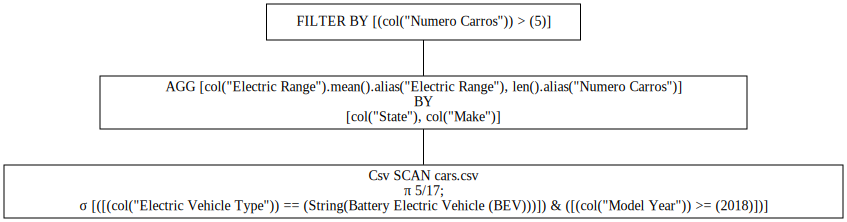

In [12]:
lazy_query = (lazy_car.filter(pl.col('Model Year')>= 2018)
                        .filter(pl.col('Electric Vehicle Type')== 'Battery Electric Vehicle (BEV)')
                        .group_by(['State', 'Make'])
                        .agg(
                            pl.mean('Electric Range').alias('Electric Range'),
                            pl.len().alias('Numero Carros')

                        )
                        .filter(pl.col('Numero Carros') > 5)
                    )

lazy_query.show_graph()

In [13]:
lazy_query.collect()

State,Make,Electric Range,Numero Carros
str,str,f64,u32
"""WA""","""KIA""",41.14854,5103
"""WA""","""RIVIAN""",0.0,4742
"""CA""","""TESLA""",52.980392,51
"""CA""","""VOLKSWAGEN""",20.833333,6
"""WA""","""SMART""",58.0,51
…,…,…,…
"""WA""","""BMW""",11.051364,2492
"""AZ""","""TESLA""",53.666667,6
"""WA""","""GENESIS""",0.0,218
